### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

#### Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

#### Loading the necessary Libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

#### Loading the dataset

In [2]:
bank = pd.read_csv("BankChurners.csv")
bank.sample(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
7343  721393083  Existing Customer            52      F                3   
5432  779635533  Existing Customer            38      F                3   
1636  715457658  Existing Customer            29      F                1   
4362  718110858  Attrited Customer            42      M                4   
4453  708773583  Existing Customer            52      F                3   

     Education_Level Marital_Status Income_Category Card_Category  \
7343             NaN         Single     $40K - $60K          Blue   
5432        Graduate         Single             abc          Blue   
1636        Graduate        Married             abc          Blue   
4362             NaN        Married     $40K - $60K          Blue   
4453        Graduate            NaN     $40K - $60K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
7343              45                         5                       3   
5432              21                         5                       1   
1636              19                         3                       3   
4362              36                         2                       3   
4453              45                         5                       2   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
7343                      1      6053.000                  577   
5432                      3      2348.000                 1028   
1636                      4      1709.000                 1465   
4362                      5      1606.000                    0   
4453                      0     10859.000                 1710   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
7343         5476.000                 0.850             5035              64   
5432         1320.000                 0.469             5125              71   
1636          244.000                 0.558             1757              48   
4362         1606.000                 0.870             2628              41   
4453         9149.000                 0.974             3987              64   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
7343                1.370                  0.095  
5432                0.578                  0.438  
1636                0.548                  0.857  
4362                0.640                  0.000  
4453                0.829                  0.157

<IPython.core.display.Javascript object>

In [3]:
bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [4]:
bank.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

- Initial observations are that some columns e.g., Marital_Status has some missing values as evidenced by NaN values.
- Some columns such as Total_Revolving_Bal has '0' as a value. More analysis needs to be done to understand the nature of this '0'. That is, whether it is a missing value or an actual value.

## EDA

In [5]:
df = bank.copy()
df.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

- One can now see that there are 21 columns and 10127 rows in the dataset.
- As was suspected earlier, Marital_Status has missing values. Education_Level has missing values too.
- There are integer and string data types. Some of these columns are categorical. They might need to be transformed at a later point in the analysis.

In [7]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

- The dataset is void of any duplicates.
- Education_Level and Marital_Status are missing 15% and 7% of their rows respectively. These are significant amounts, so dropping the missing values is not ideal. These values will be imputed appropriately. 

In [9]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

- CLIENTNUM doesn't seem to serve any purpose for the current analysis other than customer identification, so this column will be dropped.
- There are 7 categorical columns and the rest are continuous columns. 

In [10]:
df.drop("CLIENTNUM", axis=1, inplace=True)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Checking the stastical summary of the numerical columns

In [11]:
df.describe().T

count     mean      std      min      25%  \
Customer_Age             10127.000   46.326    8.017   26.000   41.000   
Dependent_count          10127.000    2.346    1.299    0.000    1.000   
Months_on_book           10127.000   35.928    7.986   13.000   31.000   
Total_Relationship_Count 10127.000    3.813    1.554    1.000    3.000   
Months_Inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
Contacts_Count_12_mon    10127.000    2.455    1.106    0.000    2.000   
Credit_Limit             10127.000 8631.954 9088.777 1438.300 2555.000   
Total_Revolving_Bal      10127.000 1162.814  814.987    0.000  359.000   
Avg_Open_To_Buy          10127.000 7469.140 9090.685    3.000 1324.500   
Total_Amt_Chng_Q4_Q1     10127.000    0.760    0.219    0.000    0.631   
Total_Trans_Amt          10127.000 4404.086 3397.129  510.000 2155.500   
Total_Trans_Ct           10127.000   64.859   23.473   10.000   45.000   
Total_Ct_Chng_Q4_Q1      10127.000    0.712    0.238    0.000    0.582   
Avg_Utilization_Ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
Customer_Age               46.000    52.000    73.000  
Dependent_count             2.000     3.000     5.000  
Months_on_book             36.000    40.000    56.000  
Total_Relationship_Count    4.000     5.000     6.000  
Months_Inactive_12_mon      2.000     3.000     6.000  
Contacts_Count_12_mon       2.000     3.000     6.000  
Credit_Limit             4549.000 11067.500 34516.000  
Total_Revolving_Bal      1276.000  1784.000  2517.000  
Avg_Open_To_Buy          3474.000  9859.000 34516.000  
Total_Amt_Chng_Q4_Q1        0.736     0.859     3.397  
Total_Trans_Amt          3899.000  4741.000 18484.000  
Total_Trans_Ct             67.000    81.000   139.000  
Total_Ct_Chng_Q4_Q1         0.702     0.818     3.714  
Avg_Utilization_Ratio       0.176     0.503     0.999

<IPython.core.display.Javascript object>

- Mean of the customers is ~46 with the 1st and 3rd quartile being 41 and 52 years. This could be an indication that majority of the customers are middle-aged.
- One can note also that the customers have been with the company for more than a year. Mean is ~35 months, minimum is 13 nonths. With a standard deviation of ~7.9, this data spread could be indicative of outliers in the data. 
- Other columns too such as Credit_limit, Avg open to buy, Total revolving balance, and Total Trans amount could have outliers based on their mean, min and max values.

#### Checking statistical summary of the categorical columns

In [12]:
df.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<IPython.core.display.Javascript object>

- There are more existing customers than those that attrited.
- One also sees that there are more female clients than male ones.
- The most frequent education level is Graduate with a frequency of 3128.
- There are more maried customers than the other marital status designations.
- Customers earning less than $40 are the majority.
- Lastly, blue card category customers are the majority.

#### Checking the value count for the categorical variables.

In [13]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

- The data in the categorical columns is consistent with what one would expect. For instance, there are less customers who have attained post-graduate and doctorate education levels. Also, there are fewer customers with an income of more than $120k. Additionally, there are fewer customers in the higher card categories, i.e., Gold and platinum.
- However, something stands out in the income category column. There is an "abc" designation. This will be treated as a missing value, and handled accordingly.

## Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observations on Customer_Age

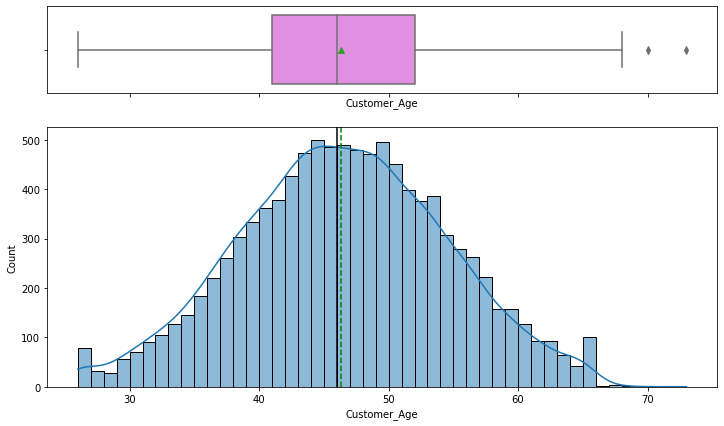

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Customer_Age")

- Customer age is mostly normally distributed apart from a few outliers in the upper limit making the distribution a slighly skewd to the right.

#### Observations on Months_on_book

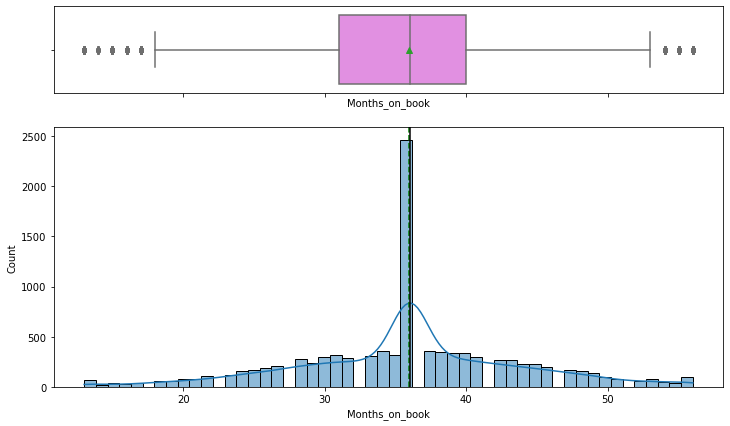

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Months_on_book")

- There is a slight skew to the left.
- The plots reveal that indeed there are outliers in the "Months_on_book" column.

#### Observations on Total_Revolving_Bal

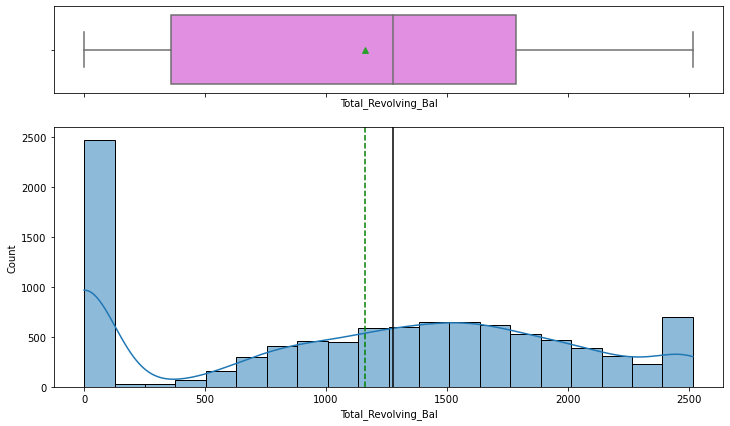

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Total_Revolving_Bal")

- There are some data extremes in this column as evidenced by the protruding bins. More investigation is needed to understand this distribution.
- The data is slighly skewed to the left.

#### Observations on Credit_Limit

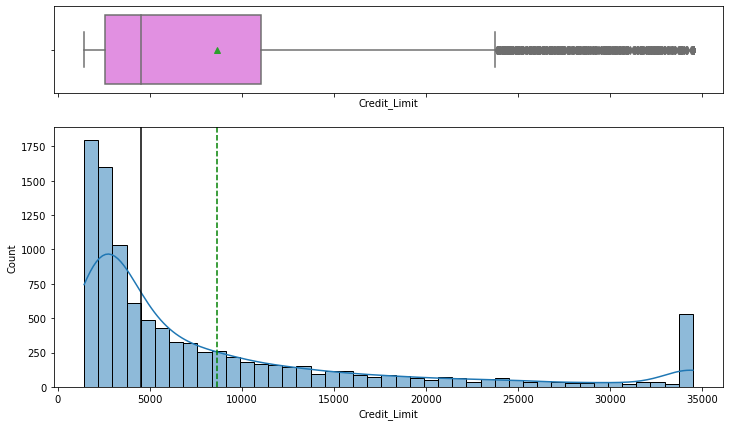

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Credit_Limit")

- There are outliers in the upper limits. More consideration will be made further into the analysis to determine whether they should be removed.
- Consequently, the data is very skewed to the right.

#### Observations on Avg_Open_To_Buy

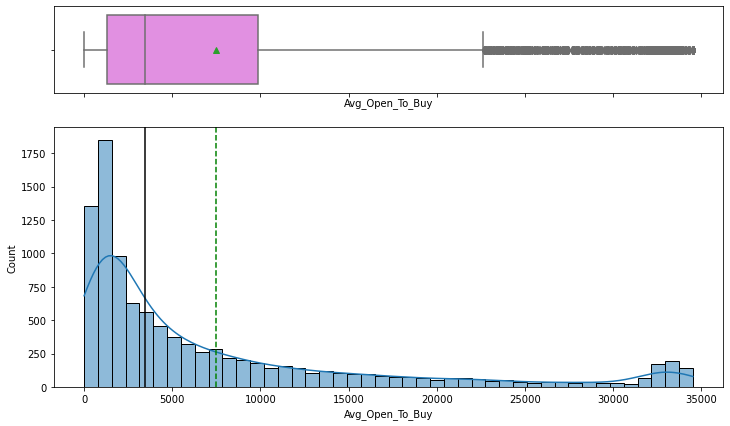

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Avg_Open_To_Buy")

- The data in this column is skewed to the right. 
- This distribution is influenced by the outliers in the upper limits.

#### Observations on Total_Amt_Chng_Q4_Q1

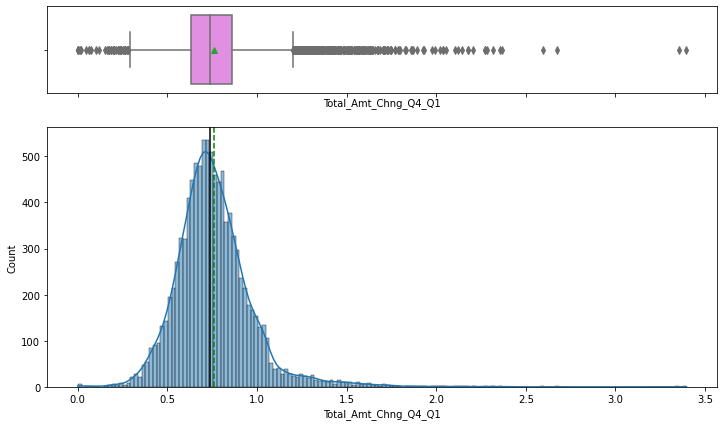

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

- There is a slight skew to the right, and there are outliers in both the upper and lower limits. More consideration will be made later in the analysis to determine whether or not to cap the column.

#### Observations on Total_Trans_Amt

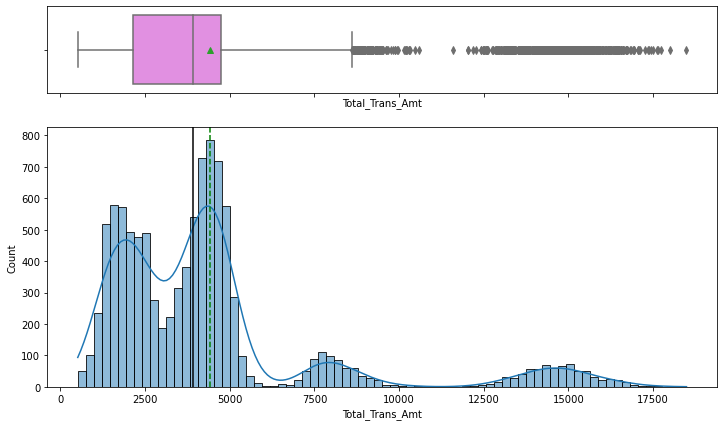

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "Total_Trans_Amt")

- There is flactuation in the data distribution in this column. 
- There appears also to be outliers in the column.

#### Observations on Total_Trans_Ct

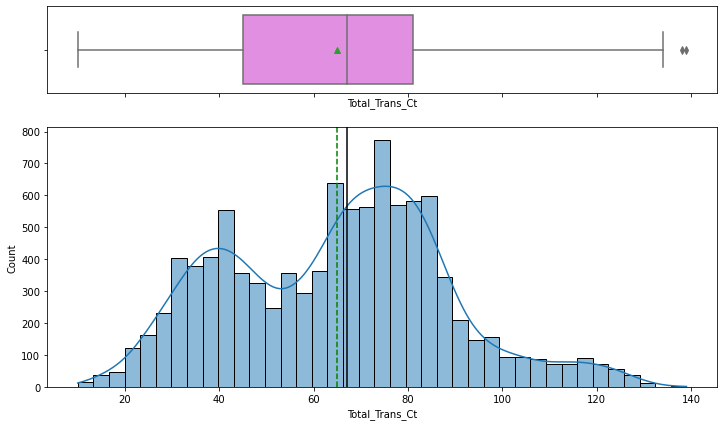

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "Total_Trans_Ct")

- There is flactuation in the distribution of the data in this column. 
- The boxplot illustrates that there are outliers in the upper limits.

#### Observations on Total_Ct_Chng_Q4_Q1

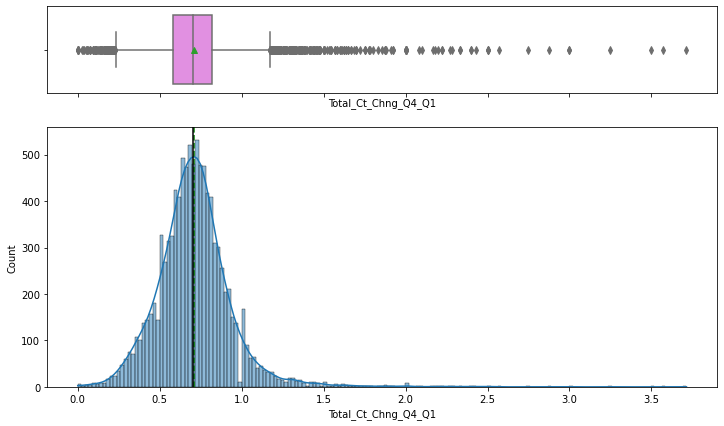

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

- There are outliers in the upper and lower limits.
- The data is also slighly skewed to the right.

#### Observations on Avg_Utilization_Ratio

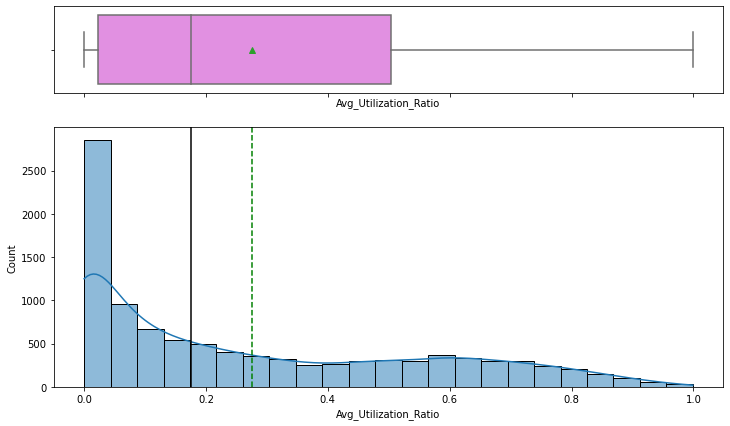

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

- This column is skewed to the right. 
- No outliers are visible at the moment.

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on Attrition_Flag

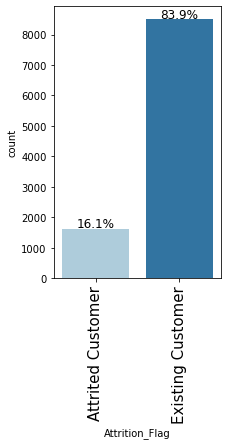

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "Attrition_Flag")

- 83.9% of the customers in the dataset are still with the company.

#### Observations on Gender

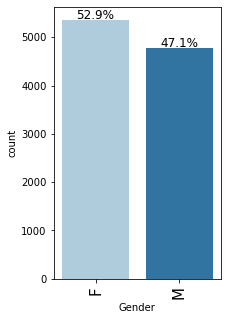

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "Gender")

- There are slightly more women (52.9%) than men (47.1%) in the dataset.

#### Observations on Dependent_count

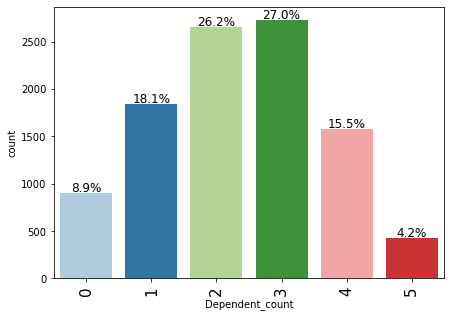

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "Dependent_count")

- Majority of the customers have either 2 (26.2%) or 3 (27%) dependents. 
- Approximately 4.2% of them have 5 dependents.

#### Observations on Education_Level

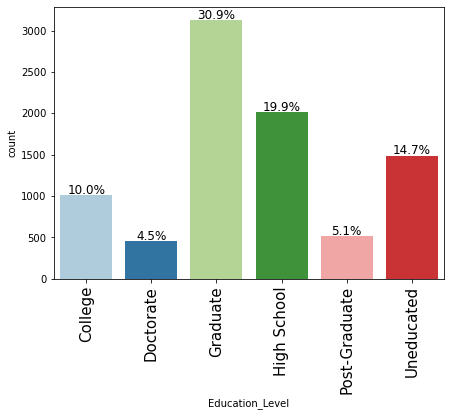

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "Education_Level")

- 30.9% of the customers have graduated from a college level institution. A relative distant second is people with only high school education at 19.9%.
- As it was noted earlier, customers with graduate (4.5%) and post-graduate (5.1%) are fewer than the other categories in this column.

#### Observations on Marital_Status

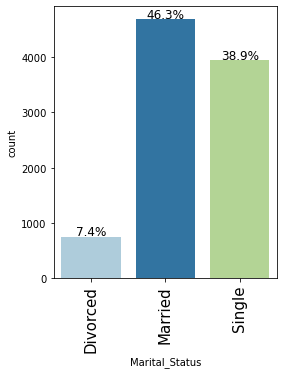

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "Marital_Status")

- Majority of the customers are married. They account for 46.3% of the entire column. 
- Single individuals are second with 38.9% and divorced individuals are 7,4%

#### Observations on Income_Category

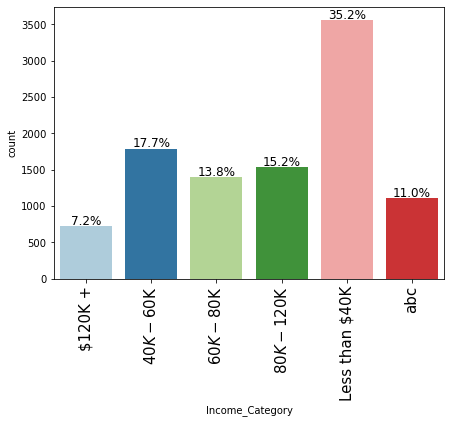

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "Income_Category")

- LIke it was observed earlier, individuals earning less than $40K account for the majority at 35.2%, and individuals earning more than 120K  only account for 7.2%.

#### Observations on Card_Category

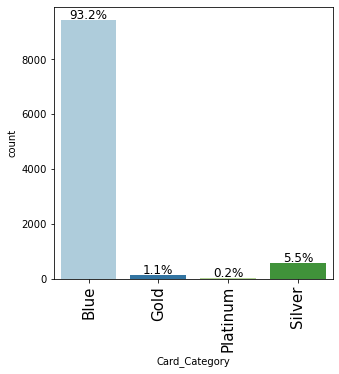

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "Card_Category")

- With a significant difference, 93.2% of the customers are blue card holders. It is possible that this is the most affordable card option. The bank needs to incentivize their customers to purchase the other card categories which might bring them more money. 

#### Observations on Months_on_book

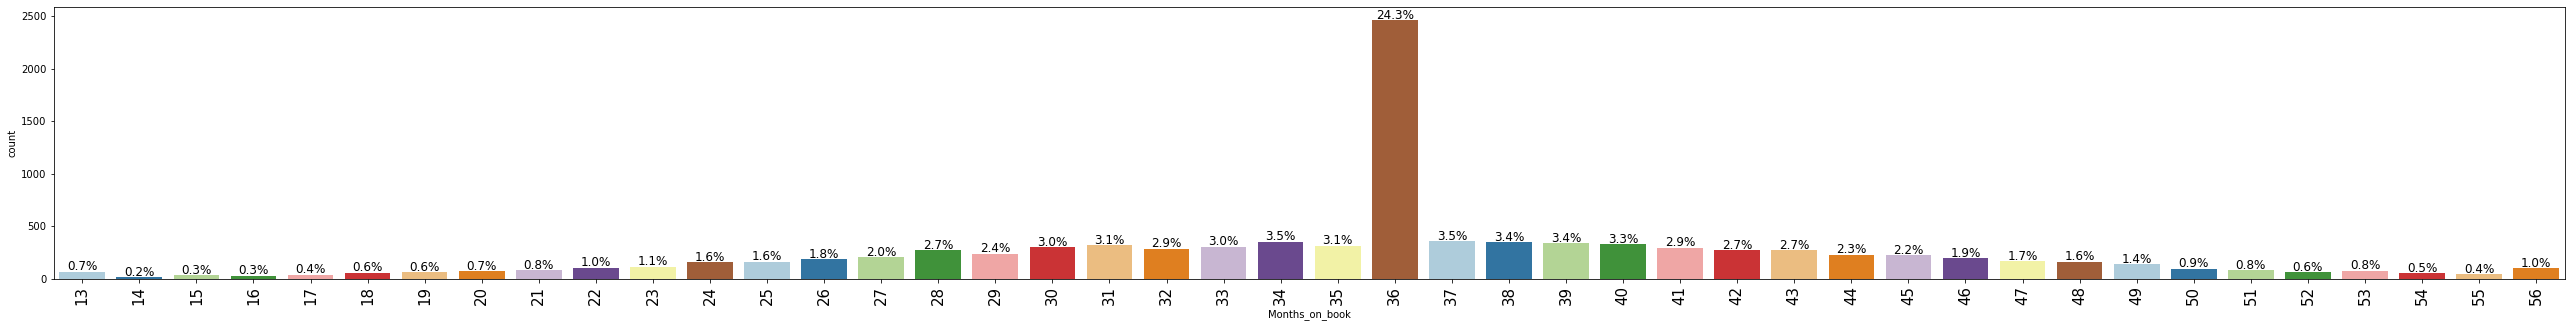

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "Months_on_book")

- There seems to be a normal distribution of the number of months on book, for majority of the months count. However, quite noticeable is the fact that 24.3% of the customers have been on book for 36 months. This could be an indication of the contract terms when someone signs up for the company's products.

#### Observations on Total_Relationship_Count

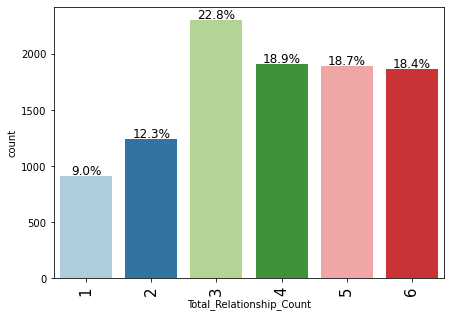

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "Total_Relationship_Count")

- Majority of the customers have a total relationship count of 3 or more. Only 12.3% and 9.0% of the customers have a relationship count of 2 and 1 respectively.

#### Observations on Months_Inactive_12_mon

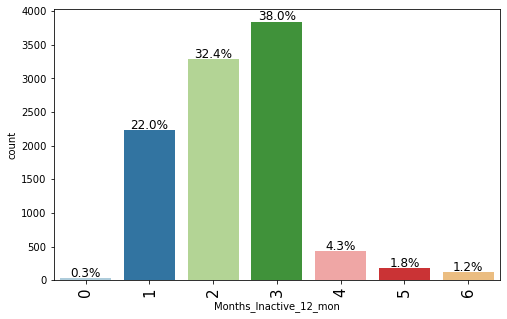

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "Months_Inactive_12_mon")

- At 38.0% majority of the customers have been inactive for 3 months. Followed by 2 months at 32.4% and then 1 month at 22.0%. 
- These are months the company didn't make more money from the customers. The company needs to find a way to keep a hold on the clientele.

#### Observations on Contacts_Count_12_mon

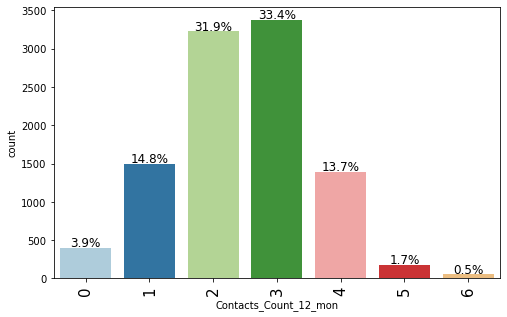

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "Contacts_Count_12_mon")

- The most frequent number of contacts between the bank and the customers in the last 12 months are 2 and 3 at 31.9% and 33.4% respectively. 
- Maybe the banl should reach out more often to the customers to encourage them to use their products more.

## Bivariate Analysis

#### Attrition_Flag vs Customer_Age

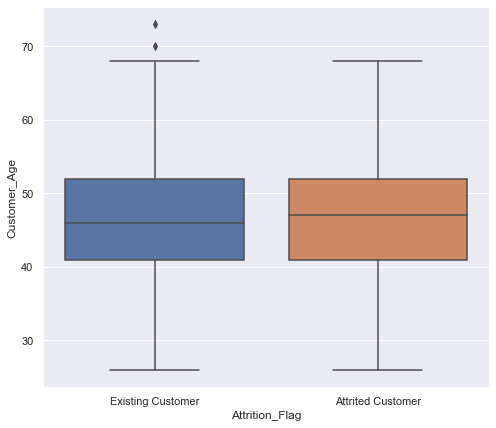

<IPython.core.display.Javascript object>

In [40]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Customer_Age", x="Attrition_Flag", data=df, orient="vertical")

- With a slight difference, the average age of attrited customers is higher than that of the existing customers.
- There are also a few age outliers among existing customers.
- No other noticeable difference exists.

#### Attrition_Flag vs Dependent_count

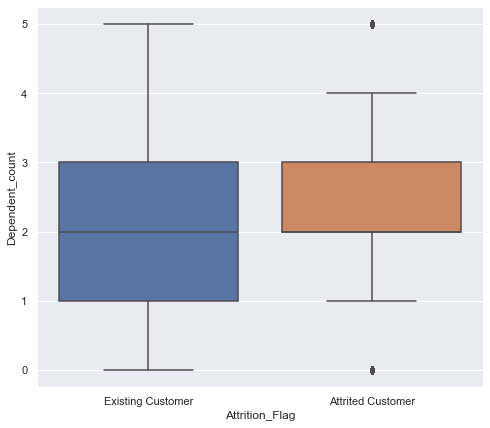

<IPython.core.display.Javascript object>

In [41]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Dependent_count", x="Attrition_Flag", data=df, orient="vertical")

- Existing customers have an average of 2 dependents.

#### Attrition_Flag vs Months_on_book

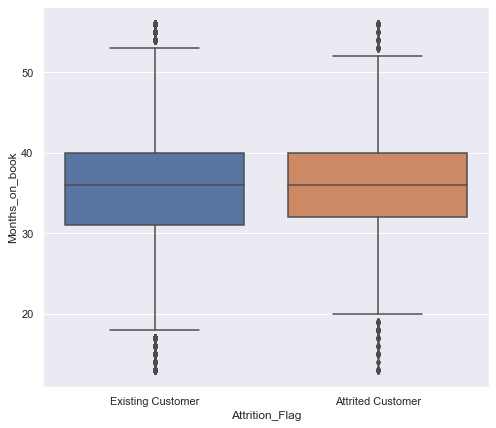

<IPython.core.display.Javascript object>

In [42]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Months_on_book", x="Attrition_Flag", data=df, orient="vertical")

- There are no striking differences between the attrition rates based months on book.

#### Attrition_Flag vs Total_Relationship_Count

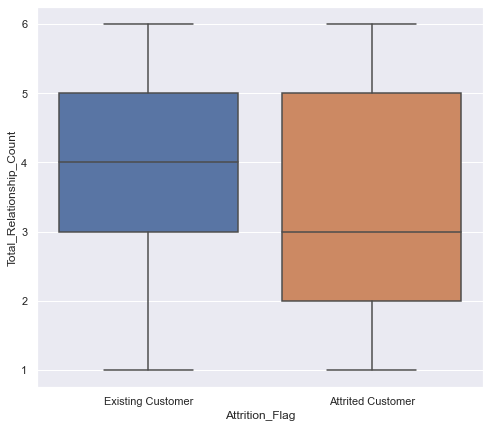

<IPython.core.display.Javascript object>

In [43]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(
    y="Total_Relationship_Count", x="Attrition_Flag", data=df, orient="vertical"
)

- On average, the attrited customers have lesser products than the existing customers. This is an opportunity for the bank to identify the products the customers are really interested in for them to keep these customers.

#### Attrition_Flag vs Months_Inactive_12_mon

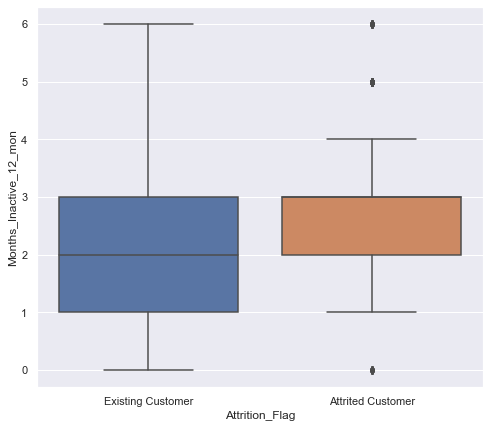

<IPython.core.display.Javascript object>

In [44]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Months_Inactive_12_mon", x="Attrition_Flag", data=df, orient="vertical")

- Understandly, attrited customers have more months inactive than the existing customers. It should also be noted that there are outliers among the attrited customers.

#### Attrition_Flag vs Contacts_Count_12_mon

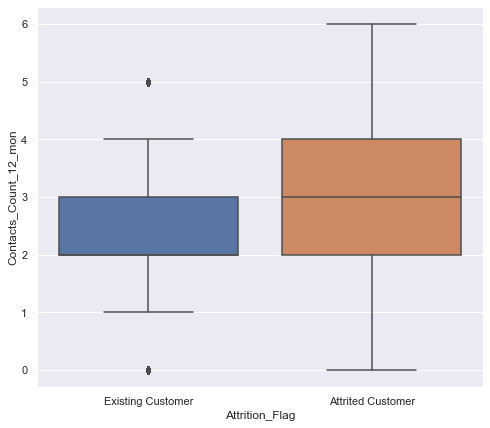

<IPython.core.display.Javascript object>

In [45]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Contacts_Count_12_mon", x="Attrition_Flag", data=df, orient="vertical")

- Interestingly, it seems like the attrited customers had more contact than the existing customers. This is an opportunity for the bank to identify the nature of the interaction to determine the reason for this relation.

#### Attrition_Flag vs Credit_Limit

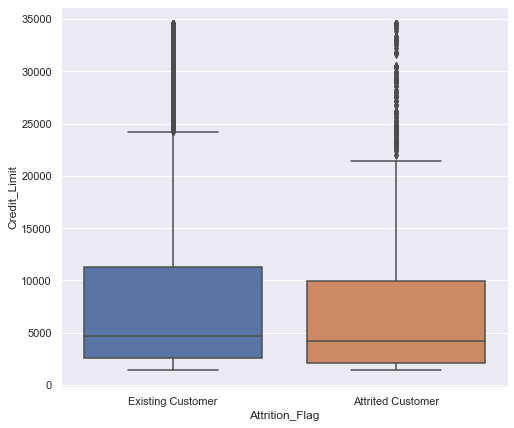

<IPython.core.display.Javascript object>

In [46]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Credit_Limit", x="Attrition_Flag", data=df, orient="vertical")

- Existing customers have a slightly higher credit limit than attrited customers. 

#### Attrition_Flag vs Total_Revolving_Bal

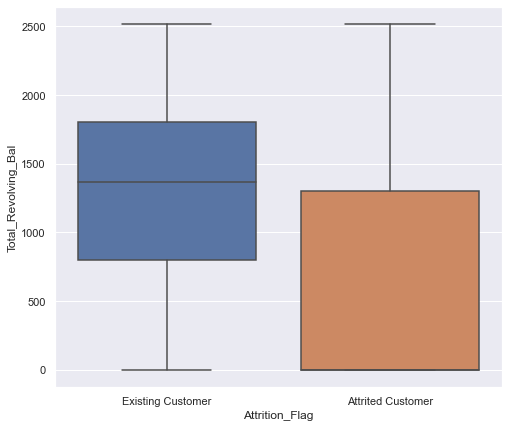

<IPython.core.display.Javascript object>

In [47]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Total_Revolving_Bal", x="Attrition_Flag", data=df, orient="vertical")

- As one would expect, existing customers have a higher revolving balance than attrited customers.

#### Attrition_Flag vs Avg_Open_To_Buy

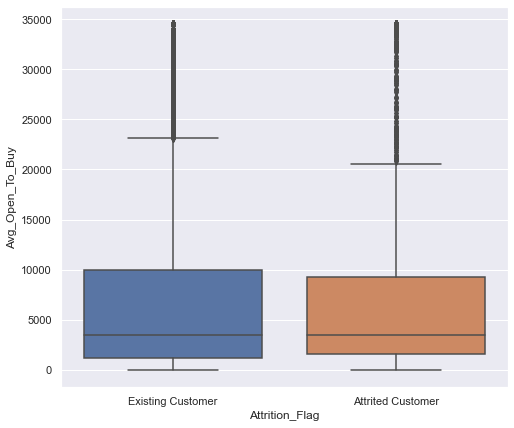

<IPython.core.display.Javascript object>

In [48]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Avg_Open_To_Buy", x="Attrition_Flag", data=df, orient="vertical")

- There isn't a noticeable difference in average amount left on the credit cards for use.

#### Attrition_Flag vs Total amt chng q4_q1

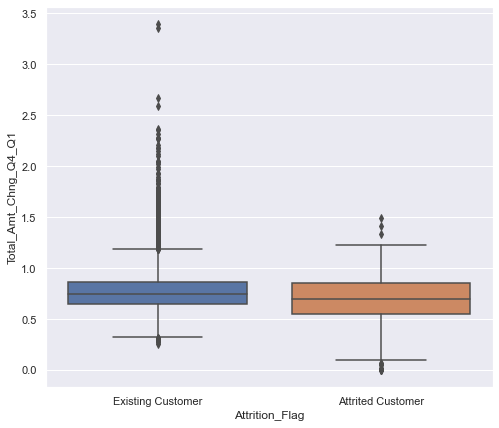

<IPython.core.display.Javascript object>

In [49]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Total_Amt_Chng_Q4_Q1", x="Attrition_Flag", data=df, orient="vertical")

- Existing customers have a slightly higher spend ratio than attrited customers.

#### Attrition_Flag vs Total_Trans_Amt

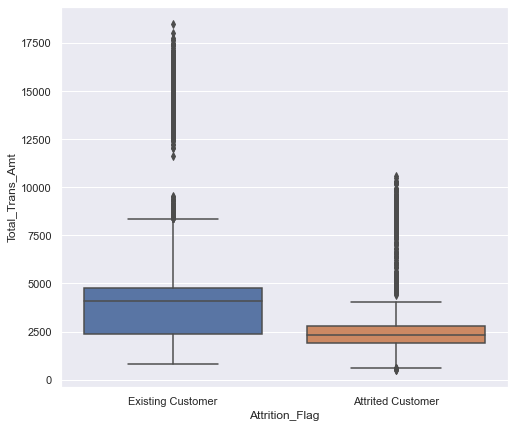

<IPython.core.display.Javascript object>

In [50]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Attrition_Flag", data=df, orient="vertical")

- As one would expect, existing customers have a higher total transaction amount than the attrited customers. This is an opportunity for the bank to either increase the number of customers or increase the amount the existing customers spend. This will ultimately increase the revenue the bank is receiving.

#### Attrition_Flag vs Total_Trans_Ct

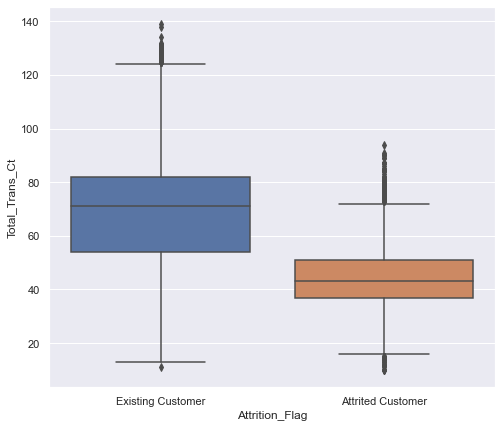

<IPython.core.display.Javascript object>

In [51]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Total_Trans_Ct", x="Attrition_Flag", data=df, orient="vertical")

- As expected, existing customers have a higher total transaction count that attrited customers.

#### Attrition_Flag vs Total ct chng q4_q1

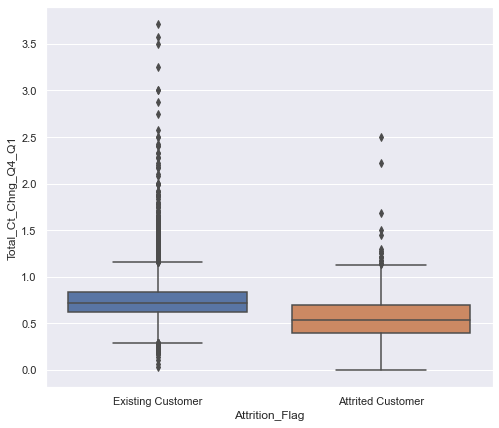

<IPython.core.display.Javascript object>

In [52]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Total_Ct_Chng_Q4_Q1", x="Attrition_Flag", data=df, orient="vertical")

- Existing customers have a higher total count change than attrited customers.

#### Attrition_Flag vs Avg_Utilization_Ratio

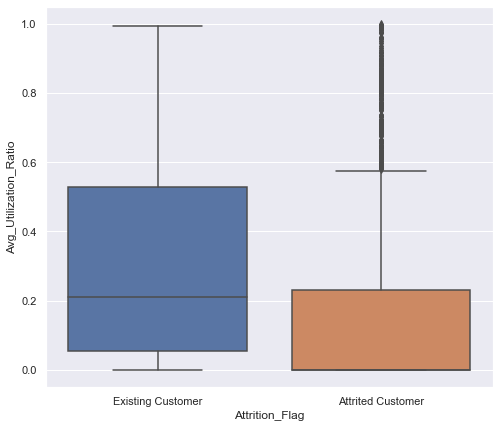

<IPython.core.display.Javascript object>

In [53]:
sns.set(rc={"figure.figsize": (8, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Attrition_Flag", data=df, orient="vertical")

- As expected, existing customers have a higher utilization ratio than the attrited customers.

In [54]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### Attrition_Flag vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


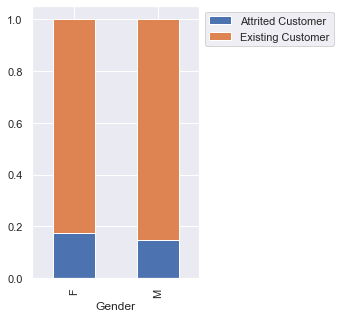

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(df, "Gender", "Attrition_Flag")

- Slightly more women than men attrite. It is important to remember that we saw earlier that there are more women than men in this dataset. Maybe the fact that there are more women could be an explanation for this observation.

#### Attrition_Flag vs Education_Level

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


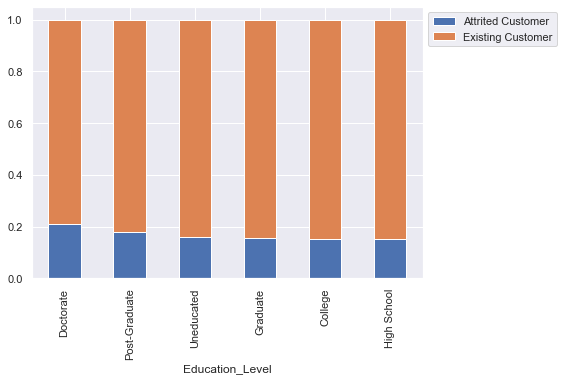

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

- There aren't significant differences in attrition based on education level. However, Doctorate and post graduate levels have are slightly more likely to churn.

#### Attrition_Flag vs Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


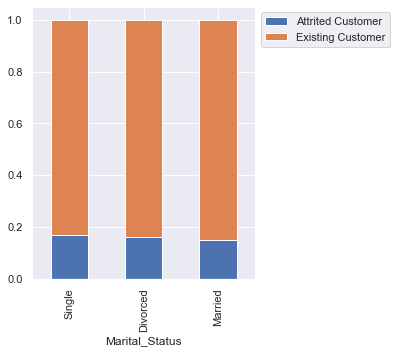

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

- No significant differences can be observed based on marital_status.

#### Attrition_Flag vs Income Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


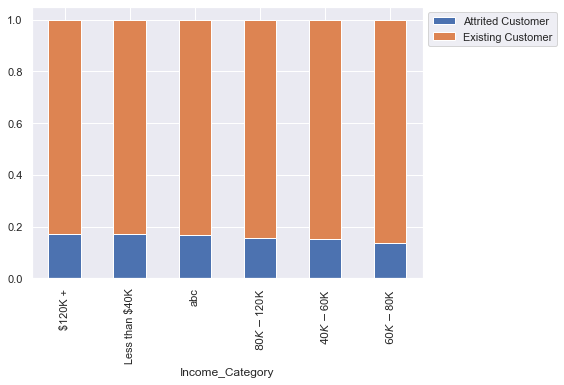

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

- Customers within the 60k-80k income seem less likely to churn than the other income categories.

#### Attrition_Flag vs Card_Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


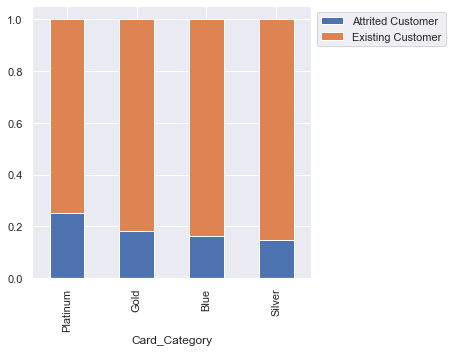

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

- Interestingly, customers in the platinum card category are more likely to churn than the customers in the other card categories. It is interesting that these customers choose to leave the bank rather than choosing other packages. This is a chance for the bank to improve what they offer.

The above data can be consolidated with the pairplots below.

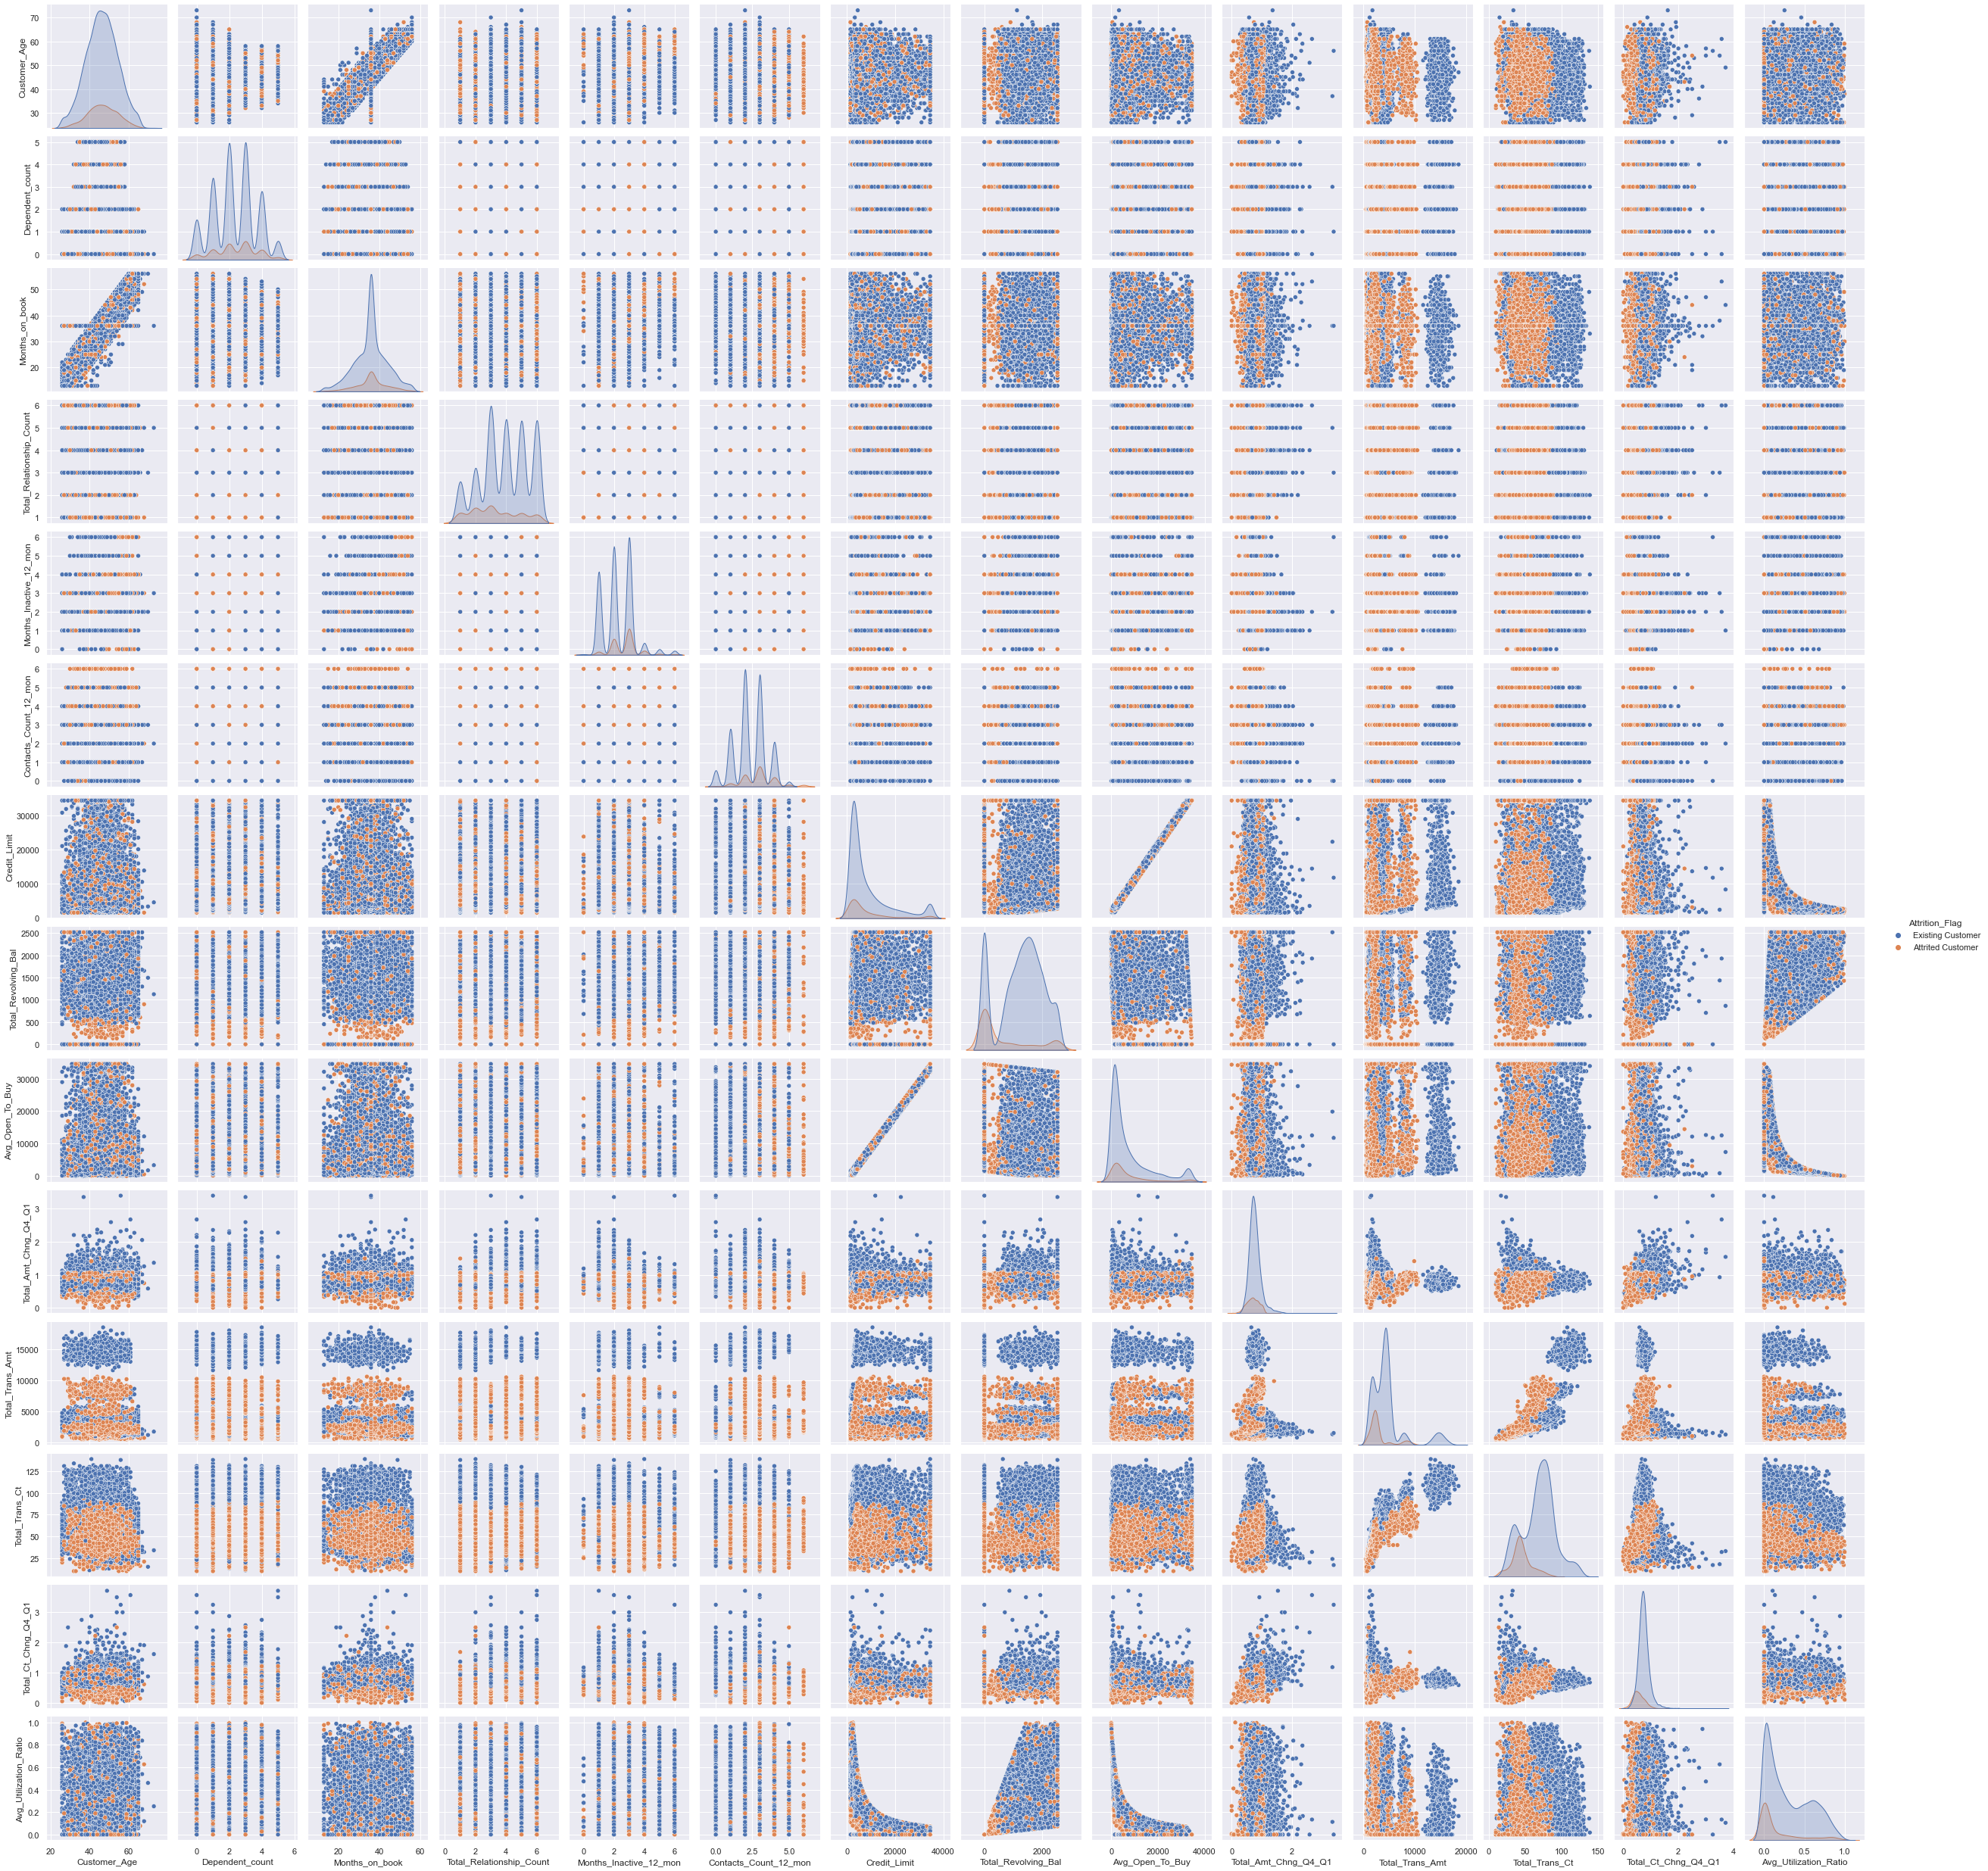

<IPython.core.display.Javascript object>

In [60]:
sns.pairplot(df, hue="Attrition_Flag")

- The observations made in previous plots still hold in the pairplots. Additionally,there seems to be correlations in some of the columns. The correlation can be confirmed with the heatmap below.

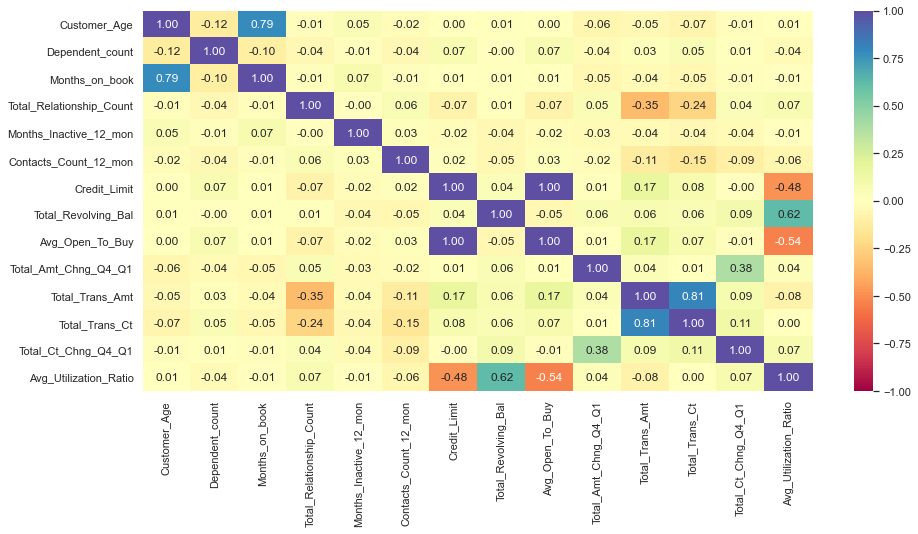

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a strong positive correlation between Months_on_book and Customer_age at a value of 0.79.
- Total_Trans_Amt and Total_Trans_Ct also have a strong positive correlation at 0.81.
- Total_Revolving_Bal and Avg_Utilization also have a strong positive correlation at 0.62.
- Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 have moderate positive correlation at 0.38.
- It is worth mentioning that there is a strong negative correlation between Avg_Open_To_Buy and Avg_Utilization_Ratio and Credit_Limit and Avg_Utilization_Ratio at -0.54 and -0.48 respectively.
- There is moderate negative correlation between Total_relationship_Count and Total_Trans_Ct, and Total_Relationship_Count and Total_Trans_Amt at -0.24 and -0.35 respectively.

### Data Preprocessing

- EDA and Visualizations have revealed that there are missing values in some of the columns and there are some data entry issues. These issues have to be resolved before models are built. Caution has to be exercise to avoid data leakage. Hence, the missing values will be treated after splitting the data into train, validation and test sets.

In [62]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [63]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

- Some of the columns contain redundant information. For instance, the average utilization ratio is obtain from the credit limit and revolving balance.
- Additionally, the information contained in the total transaction amount and total transaction count is accounted for in the total transaction change amount and total transaction change count respectively.
    - From a bank's perspective, retaining information about quarters might be more beneficial for planning purposes. The bank could also analyse trends within quarters and plan accordingly. 
- Therefore, the redudant columns will be dropped to easen the processing load.

*Average open to buy amount is calculated as the difference between the credit limit and the credit card balance. This information could also be gotten from other redudant columns but it is left in the hopes that the average balance left on cards could contribute to the customer profile.

In [64]:
# Dropping redudant columns.

df.drop(
    columns=[
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
    ],
    inplace=True,
)

<IPython.core.display.Javascript object>

### Data Preparation for Modeling

In [65]:
df2 = df.copy()

<IPython.core.display.Javascript object>

#### Splitting the Data

In [66]:
X = df2.drop(["Attrition_Flag"], axis=1)
y = df2["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [90]:
y = pd.get_dummies(data=y, drop_first=True)

<IPython.core.display.Javascript object>

In [91]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 15) (2026, 15) (2026, 15)


<IPython.core.display.Javascript object>

#### Treating 'abc' in Income Category

In [92]:
X_train.loc[X_train["Income_Category"] == "abc", "Income_Category"] = np.nan
X_val.loc[X_val["Income_Category"] == "abc", "Income_Category"] = np.nan
X_test.loc[X_test["Income_Category"] == "abc", "Income_Category"] = np.nan

<IPython.core.display.Javascript object>

### Missing Value Treatment

- Education_Level and Marital_Status will be imputed with the most frequent values in those columns.

In [93]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
X_train["Education_Level"] = imp_mode.fit_transform(X_train[["Education_Level"]])
X_train["Marital_Status"] = imp_mode.fit_transform(X_train[["Marital_Status"]])
X_train["Income_Category"] = imp_mode.fit_transform(X_train[["Income_Category"]])
# transform the validation and test data using the imputer fit on train data
X_val["Education_Level"] = imp_mode.transform(X_val[["Education_Level"]])
X_val["Marital_Status"] = imp_mode.transform(X_val[["Marital_Status"]])
X_val["Income_Category"] = imp_mode.fit_transform(X_val[["Income_Category"]])

X_test["Education_Level"] = imp_mode.transform(X_test[["Education_Level"]])
X_test["Marital_Status"] = imp_mode.transform(X_test[["Marital_Status"]])
X_test["Income_Category"] = imp_mode.fit_transform(X_test[["Income_Category"]])

<IPython.core.display.Javascript object>

In [94]:
X_test.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

In [95]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 15) (2026, 15) (2026, 15)


<IPython.core.display.Javascript object>

- Outliers will not be treated before model building because some of the models to be built have internal mechanisms to deal with outliers. They are likely to present an accurate representation of the dataset.
- The next step is to prepare the data for modelling by creating dummies.

In [96]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

<IPython.core.display.Javascript object>

In [97]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 25) (2026, 27) (2026, 27)


<IPython.core.display.Javascript object>

In [98]:
X_test.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Less than $40K',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Less than $40K', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

<IPython.core.display.Javascript object>

In [99]:
X_test.drop(
    columns=["Education_Level_Less than $40K", "Marital_Status_Less than $40K"],
    axis=1,
    inplace=True,
)
X_test.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

<IPython.core.display.Javascript object>

In [100]:
X_val.drop(
    columns=["Education_Level_Less than $40K", "Marital_Status_Less than $40K"],
    axis=1,
    inplace=True,
)
X_val.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

<IPython.core.display.Javascript object>

In [101]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 25) (2026, 25) (2026, 25)


<IPython.core.display.Javascript object>

In [103]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 94.64598125805767
Random forest: 97.96041871115472
GBM: 97.64657776751525
Adaboost: 96.8817564317189
Xgboost: 96.56791548807944
dtree: 90.19413496507534
Logistic: 98.66657045546384

Validation Performance:

Bagging: 0.9511764705882353
Random forest: 0.9811764705882353
GBM: 0.981764705882353
Adaboost: 0.9682352941176471
Xgboost: 0.9682352941176471
dtree: 0.9052941176470588
Logistic: 0.9894117647058823


<IPython.core.display.Javascript object>

- There is commendable performance by all the models. The models are not overfitting. The performance of these models can be visualized as seen below.

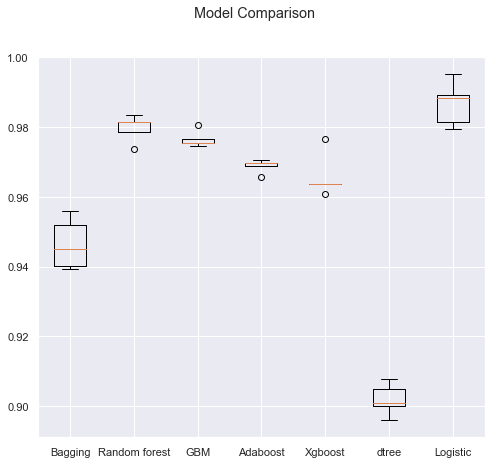

<IPython.core.display.Javascript object>

In [107]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- One can seen that the logistic regression model gives the highest cross-validated score followed by Random Forest and then the Gradient Boosting Model.
- As it was mentioned above, these models do not overfit. However, EDA and subsequent analysis revealed that there are data imbalances. Therefore,  other data variations will be tested to see if performance can improve even further.

### Model Building with Undersampled Data

- The Undersampling technique which will be applied is **TomekLinks** which deletes the nearest majority neighbors.

In [109]:
# !pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


<IPython.core.display.Javascript object>

In [110]:
from imblearn.under_sampling import TomekLinks

<IPython.core.display.Javascript object>

In [111]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [116]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(("Bagging", BaggingClassifier(random_state=1)))
models2.append(("Random forest", RandomForestClassifier(random_state=1)))
models2.append(("GBM", GradientBoostingClassifier(random_state=1)))
models2.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models2.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models2.append(("dtree", DecisionTreeClassifier(random_state=1)))
models2.append(("Logistic", LogisticRegression(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models
score2 = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models2:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_tl, y=y_tl, scoring=scoring, cv=kfold
    )
    results2.append(cv_result)
    names2.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models2:
    model.fit(X_tl, y_tl)
    scores2 = recall_score(y_val, model.predict(X_val))
    score.append(scores2)
    print("{}: {}".format(name, scores2))


Cross-Validation Performance:

Bagging: 94.30310458078864
Random forest: 97.25868752452888
GBM: 97.17298851761832
Adaboost: 96.27340140597781
Xgboost: 96.42329433959667
dtree: 89.22694171136372
Logistic: 98.0725985802516

Validation Performance:

Bagging: 0.9429411764705883
Random forest: 0.9794117647058823
GBM: 0.9776470588235294
Adaboost: 0.9635294117647059
Xgboost: 0.9635294117647059
dtree: 0.898235294117647
Logistic: 0.9752941176470589


<IPython.core.display.Javascript object>

- There is a slight decrease in model performance. 
- How the models compare to each other can be seen below.

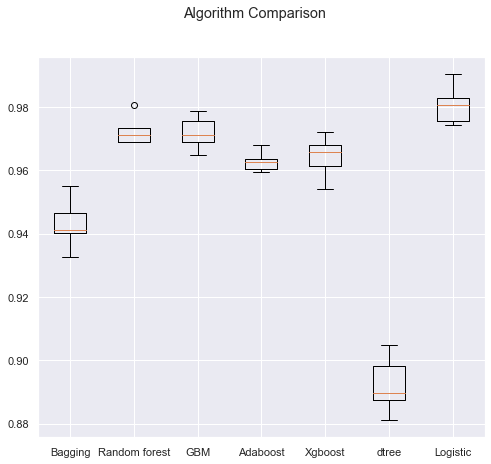

<IPython.core.display.Javascript object>

In [122]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names2)

plt.show()

- The logistic regression model continues to outperform the other models. Interestingly, now the Random Forest and Gradient Boost models seem to have a similar performance, and are, therefore, 2nd and 3rd.

### Model Building with Oversampled Data

- For oversamping, SMOTE oversampling technique with be used.

In [118]:
from imblearn.over_sampling import SMOTE

<IPython.core.display.Javascript object>

In [120]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


<IPython.core.display.Javascript object>

In [121]:
models3 = []  # Empty list to store all the models

# Appending models into the list
models3.append(("Bagging", BaggingClassifier(random_state=1)))
models3.append(("Random forest", RandomForestClassifier(random_state=1)))
models3.append(("GBM", GradientBoostingClassifier(random_state=1)))
models3.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models3.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models3.append(("dtree", DecisionTreeClassifier(random_state=1)))
models3.append(("Logistic", LogisticRegression(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models
score3 = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models3:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_res, y=y_train_res, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names3.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models3:
    model.fit(X_train_res, y_train_res)
    scores3 = recall_score(y_val, model.predict(X_val))
    score.append(scores3)
    print("{}: {}".format(name, scores3))


Cross-Validation Performance:

Bagging: 86.76201196867363
Random forest: 92.35140179722528
GBM: 92.05730339240701
Adaboost: 90.01749119667494
Xgboost: 93.56737670534358
dtree: 82.74167292039485
Logistic: 79.58486790201852

Validation Performance:

Bagging: 0.8458823529411764
Random forest: 0.9017647058823529
GBM: 0.8788235294117647
Adaboost: 0.8441176470588235
Xgboost: 0.9058823529411765
dtree: 0.8094117647058824
Logistic: 0.7652941176470588


<IPython.core.display.Javascript object>

- Model performance with the oversampled data is noticeable poorer than that of previous data sets.
- The plots below indicate how the various models compare.

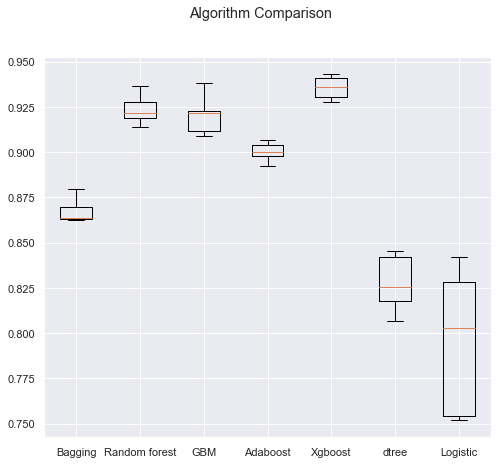

<IPython.core.display.Javascript object>

In [123]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names3)

plt.show()

- xgboost model performs the best followed by Gradient Boost model and then the Random Forest model.
- But like it was already mentioned, these models perform the poorest of all the models from the other data set variations.

#### 3 Better-Performing Models

- The 3 better performing models are from the original dataset.
- Based on their cross validation scores, the logistic regression model is the best one, followed by Random Forest and then finally the Gradient Boosting model.
- Apart from the poor performance from the logistic model in the oversampled data, these 3 models have had consistent performance in all the data set variations. 
- Therefore, they could offer the most accurate results based on this dataset. They will therefore be hypertuned using random search to check whether their performance will improve further.

### Hyperparameter Tuning Using Random Search

In [124]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [125]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Gradient Boost - Random Search

In [139]:
# defining model
model = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        gbm_tuned.best_params_, gbm_tuned.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_features': 1} with CV score=0.9911741615193673:


<IPython.core.display.Javascript object>

#### Building a Model with the best parameters

In [131]:
gbm_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    subsample=0.8,
    n_estimators=100,
    max_features=1,
)

gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

In [134]:
gbm_random_train = model_performance_classification_sklearn(gbm_tuned, X_train, y_train)

print("Performance on Training")
gbm_random_train

Performance on Training


Accuracy  Recall  Precision    F1
0     0.886   0.994      0.885 0.936

<IPython.core.display.Javascript object>

In [136]:
gbm_random_val = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)

print("Performance on Validation")
gbm_random_val

Performance on Validation


Accuracy  Recall  Precision    F1
0     0.872   0.995      0.870 0.929

<IPython.core.display.Javascript object>

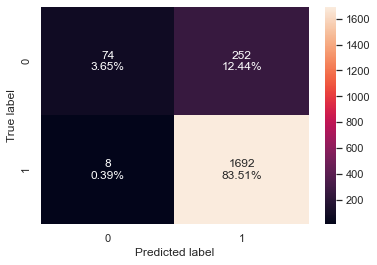

<IPython.core.display.Javascript object>

In [137]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned, X_val, y_val)

- The tuned model performs even better than it was without hyperparameter tuning. 
- There is a slight increase in the recall score in the validation dataset. The other metrics decrease slightly.
- The model is able to identify the churners 83.51% of the time. 

#### Random Forest - Random Search

In [150]:
ranfo = RandomForestClassifier(random_state=1)
# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 25, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(5, 11, 1),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 60, 5),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Calling RandomizedSearchCV
ranfo_tuned = RandomizedSearchCV(
    estimator=ranfo,
    param_distributions=parameters,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
ranfo_tuned.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        ranfo_tuned.best_params_, ranfo_tuned.best_score_
    )
)

Best parameters are {'n_estimators': 50, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 5} with CV score=0.9954888491215919:


<IPython.core.display.Javascript object>

#### Building a Model with the best Parameters

In [151]:
ranfo_tuned = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=17,
    min_samples_leaf=6,
    max_features="log2",
    max_depth=5,
    random_state=1,
)

ranfo_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=6,
                       min_samples_split=17, n_estimators=50, random_state=1)

<IPython.core.display.Javascript object>

In [152]:
ranfo_random_train = model_performance_classification_sklearn(
    ranfo_tuned, X_train, y_train
)

print("Performance on Training")
ranfo_random_train

Performance on Training


Accuracy  Recall  Precision    F1
0     0.876   0.995      0.874 0.931

<IPython.core.display.Javascript object>

In [158]:
ranfo_random_val = model_performance_classification_sklearn(ranfo_tuned, X_val, y_val)

print("Performance on Validation")
ranfo_random_val

Performance on Validation


Accuracy  Recall  Precision    F1
0     0.870   0.996      0.868 0.928

<IPython.core.display.Javascript object>

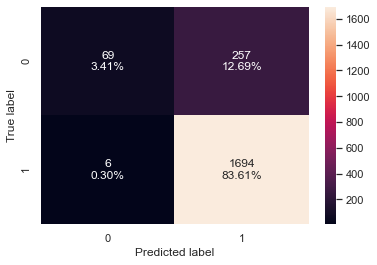

<IPython.core.display.Javascript object>

In [154]:
confusion_matrix_sklearn(ranfo_tuned, X_val, y_val)

- There is an improvement in model performance after random search CV.
- Recall score remains the same for the training and validation sets. The other metrics drop slightly in the validation set.
- The model is able to correctly identifier the churners 83.61% of the time.This is an acceptable score.

#### Logistic Regression - Random Search

In [149]:
lr = LogisticRegression(random_state=1)

param = {
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["liblinear", "lbfgs"],
    "C": [100, 10, 1.0, 0.1, 0.01],
    "class_weight": ["dict", "balanced"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Calling RandomizedSearchCV
lr_tuned = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
lr_tuned.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        lr_tuned.best_params_, lr_tuned.best_score_
    )
)

Best parameters are {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'dict', 'C': 0.01} with CV score=0.995097077103658:


<IPython.core.display.Javascript object>

#### Building a Logistic Regression Model with the best Parameters

In [155]:
lr_tuned = LogisticRegression(
    solver="lbfgs", penalty="l2", class_weight="dict", C=0.01, random_state=1
)

lr_tuned.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='dict', random_state=1)

<IPython.core.display.Javascript object>

In [156]:
lr_random_train = model_performance_classification_sklearn(lr_tuned, X_train, y_train)

print("Performance on Training")
lr_random_train

Performance on Training


Accuracy  Recall  Precision    F1
0     0.848   0.996      0.849 0.917

<IPython.core.display.Javascript object>

In [157]:
lr_random_val = model_performance_classification_sklearn(lr_tuned, X_val, y_val)

print("Performance on Validation")
lr_random_val

Performance on Validation


Accuracy  Recall  Precision    F1
0     0.846   0.998      0.846 0.916

<IPython.core.display.Javascript object>

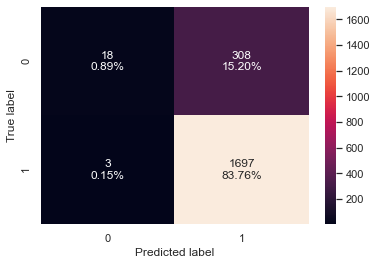

<IPython.core.display.Javascript object>

In [159]:
confusion_matrix_sklearn(lr_tuned, X_val, y_val)

- The logistic Regression model continues to have very high recall scores in the training and validation sets.
- The model is able to label churners accurately, 83.76% of the time.

### Model Performances (after tuning)

In [160]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        lr_random_train.T,
        ranfo_random_train.T,
        gbm_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Tuned  Random Forest  Gradient Boosting boost
Accuracy            0.848          0.876                    0.886
Recall              0.996          0.995                    0.994
Precision           0.849          0.874                    0.885
F1                  0.917          0.931                    0.936

<IPython.core.display.Javascript object>

In [162]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        lr_random_val.T,
        ranfo_random_val.T,
        gbm_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Logistic Regression  Random Forest  Gradient Boosting
Accuracy                 0.846          0.870              0.872
Recall                   0.998          0.996              0.995
Precision                0.846          0.868              0.870
F1                       0.916          0.928              0.929

<IPython.core.display.Javascript object>

- With recall as the metric of interest, Logistic regression model is the best performer. It does not overfit and the scores are high too.
- The model's performance can now be checked against the test set.

In [164]:
lr_test = model_performance_classification_sklearn(lr_tuned, X_test, y_test)

print("Performance of Test Set")

lr_test

Performance of Test Set


Accuracy  Recall  Precision    F1
0     0.856   0.998      0.855 0.921

<IPython.core.display.Javascript object>

- The model still has great performance on the test set. In other words, the performance is generalized.

### Productionizing the Model

In [175]:
df2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

In [184]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

<IPython.core.display.Javascript object>

In [181]:
# Separating target variable and other variables
X = df2.drop("Attrition_Flag", axis=1)
Y = df2["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [182]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 15) (3039, 15)


<IPython.core.display.Javascript object>

In [185]:
# Creating new pipeline with best parameters
pipe = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "LR",
            LogisticRegression(
                solver="lbfgs",
                penalty="l2",
                class_weight="dict",
                C=0.01,
                random_state=1,
            ),
        ),
    ]
)
# Fit the model on training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                    

<IPython.core.display.Javascript object>

## Conclusion and Insights

- The best test recall is 99.8% and the precision is 85.5%. This means that the model is doing an acceptable job in identifying the churners and non-churners. Therefore, the bank is able to minimize their loss, and increase their revenue by targetting customers who will not attrite.
- Analysis of the dataset revealed that holders of the platinum card, which is presumably more expensive and has more perks are more likely to attrite. It is concerning that these customers choose to leave the bank instead of even downgrading to the other cards. The bank should, therefore, find ways of retaining these clients through incentives such as reduced membership fees or something of that nature. These customers should also have more products available to them.
- Analysis also revealed that customers with the higher education levels are lightly more likely to attrite. This could be a missed opportunity for the bank since some of these individuals might be getting ready to join the job market. Having a credit card to as you look for a job could be relieving. The bank would, however, need to have mechanisms to ensure that their money is paid back.
- Closely related to the above point, if there are student perks to the card holders, these perks could be made available to the above students for a little bit longer to ensure they continue doing business with the bank.
- In as much as it is not by a significant amount, the bank needs to try and establish why more women than men leave the bank. The bank needs to reach out to the female customers to find out what products they are most interested in, and provide those products to them.
- Additionally, it seems like the older customers are more likely to leave the bank. The bank needs to establish of maintaining these customers. Maybe the could present products and services  that the older customers will get to enjoy as they approach retirement